In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = (17, 8)

In [3]:
RESULT_ROOT = Path('results')
result_dir = {folder.name: folder for folder in RESULT_ROOT.iterdir() if folder.is_dir()}

for name, folder in result_dir.items():
    result_dir[name] = {sub_dir.name: sub_dir for sub_dir in folder.iterdir()}

in_domain_paths = result_dir['in-domain']
general_model_paths = result_dir['general_model']

In [4]:
def load_result_df(result_dir, method_label):
    result = pd.DataFrame()
    for file in result_dir.glob('*.csv'):
        tmp = pd.read_csv(file)
        result = pd.concat([result, tmp], axis='index')
    result.model_name = result.model_name.map(lambda x: f'{x}-{method_label}')
    return result

In [5]:
in_rf_result = load_result_df(method_label='in-domain', result_dir=in_domain_paths['RandomForestRegressor'])
in_lbg_result = load_result_df(method_label='in-domain', result_dir=in_domain_paths['LGBMRegressor'])
in_domain_df = pd.concat([in_lbg_result, in_rf_result], axis='index')

In [7]:
gen_rf_result = load_result_df(method_label='general', result_dir=general_model_paths['RandomForestRegressor'])
gen_lbg_result = load_result_df(method_label='general', result_dir=general_model_paths['LGBMRegressor'])
gen_domain_df = pd.concat([gen_rf_result, gen_lbg_result], axis='index')
result = pd.concat([gen_domain_df, in_domain_df], axis='index')

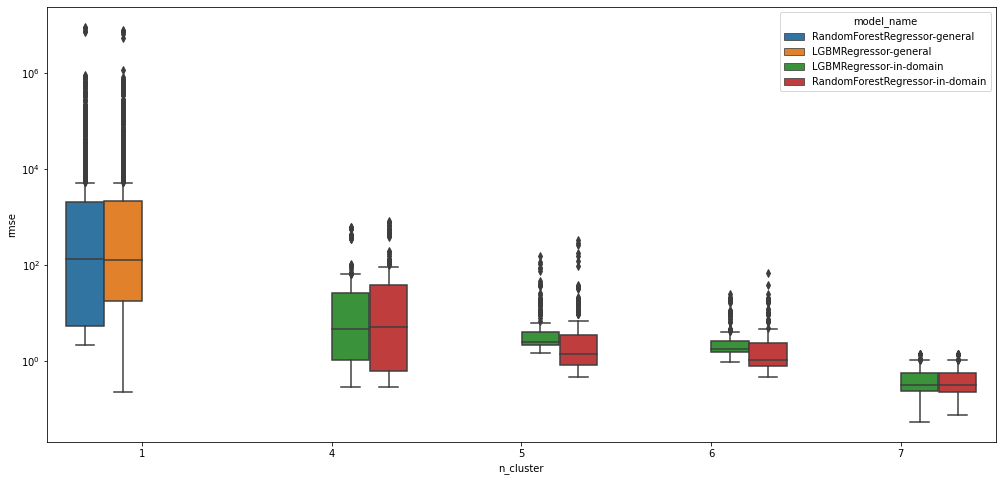

In [8]:
sns.boxplot(data=result, x='n_cluster', y='rmse', hue='model_name')
plt.yscale('log')

<AxesSubplot:xlabel='n_cluster', ylabel='time'>

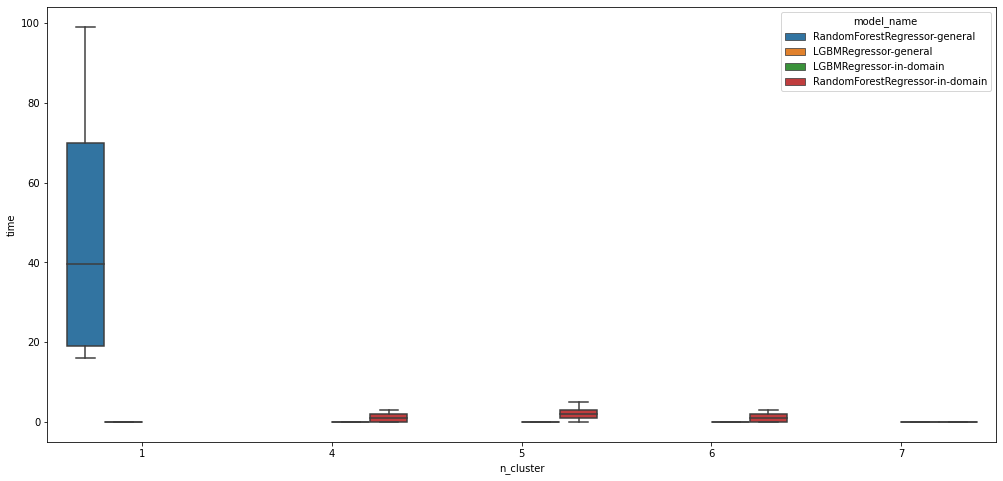

In [9]:
sns.boxplot(data=result, x='n_cluster', y='time', hue='model_name')
# plt.yscale('log')

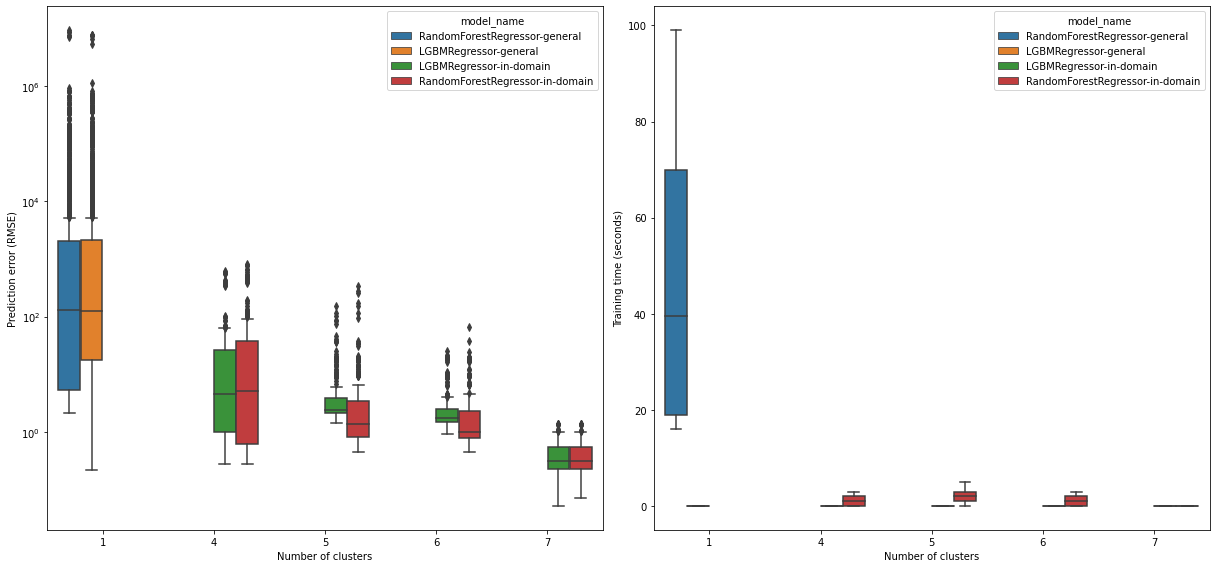

In [14]:
sizes = result.window_size.unique()

fig, ax = plt.subplots(1,2)

sns.boxplot(data=result, x='n_cluster', y='rmse', hue='model_name', ax=ax[0])
ax[0].set_ylabel('Prediction error (RMSE)')
ax[0].set_xlabel('Number of clusters')
ax[0].set_yscale('log')
plt.tight_layout()

sns.boxplot(data=result, x='n_cluster', y='time', hue='model_name', ax=ax[1])
ax[1].set_ylabel('Training time (seconds)')
ax[1].set_xlabel('Number of clusters')

plt.tight_layout()
plt.savefig('plots/rmse_cluster.png')
plt.show()

In [10]:
table = result[['model_name', 'n_cluster', 'rmse']].groupby(['model_name', 'n_cluster'], as_index=False)

In [11]:
result.index = range(result.shape[0])
table = result.pivot_table(values='rmse', columns='n_cluster', index='model_name', aggfunc=np.mean, fill_value='-')
table.to_latex('results/mean_rmse.tex', float_format="{:.4f}".format, caption='Mean error for municipality number of cases predition')
table

/var/folders/zp/12jqqjln6qdgg08yb4x3z2x00000gn/T/ipykernel_37011/2592853152.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table.to_latex('results/mean_rmse.tex', float_format="{:.4f}".format, caption='Mean error for municipality number of cases predition')


n_cluster,1,4,5,6,7
model_name,,,,,
LGBMRegressor-general,41413.245033,-,-,-,-
LGBMRegressor-in-domain,-,39.65659,6.768158,3.297978,0.406621
RandomForestRegressor-general,42884.996139,-,-,-,-
RandomForestRegressor-in-domain,-,50.238938,8.255209,3.138709,0.410352
